In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Installation and Clone Repos

In [1]:
!git clone https://github.com/advimman/lama.git
!git clone https://github.com/lorenzo-stacchio/Stable-Diffusion-Inpaint.git

Cloning into 'lama'...
remote: Enumerating objects: 478, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 478 (delta 154), reused 110 (delta 110), pack-reused 204 (from 2)
Receiving objects: 100% (478/478), 8.84 MiB | 33.89 MiB/s, done.
Resolving deltas: 100% (192/192), done.
Cloning into 'Stable-Diffusion-Inpaint'...
remote: Enumerating objects: 1091, done.
remote: Total 1091 (delta 0), reused 0 (delta 0), pack-reused 1091 (from 1)
Receiving objects: 100% (1091/1091), 48.90 MiB | 43.35 MiB/s, done.
Resolving deltas: 100% (580/580), done.


In [2]:
!pip install -q webdataset
!pip install -q hydra-core --upgrade
!pip install -q albumentations==0.5.2
!pip install ipywidgets gradio
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cpu/torch1.9/index.html
!pip install git+https://github.com/facebookresearch/detectron2.git@main
!pip install ipywidgets gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 34.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 116.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.6 MB/s eta 0:00:00
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cpu/torch1.9/index.html
ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2
  Cloning https://github.com/f

In [6]:
!wget -O models/ldm/inpainting_big/model_compvis.ckpt https://ommer-lab.com/files/latent-diffusion/inpainting_big.zip --no-check-certificate

--2025-04-27 13:24:46--  https://ommer-lab.com/files/latent-diffusion/inpainting_big.zip
Resolving ommer-lab.com (ommer-lab.com)... 141.84.41.65
Connecting to ommer-lab.com (ommer-lab.com)|141.84.41.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3311259854 (3.1G) [application/zip]
Saving to: ‘models/ldm/inpainting_big/model_compvis.ckpt’

models/ldm/inpainti 100%[===================>]   3.08G  17.9MB/s    in 3m 0s   

2025-04-27 13:27:47 (17.6 MB/s) - ‘models/ldm/inpainting_big/model_compvis.ckpt’ saved [3311259854/3311259854]



# Manual Script for Stable Difussion

2025-04-27 16:00:08.620785: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745769608.891255      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745769608.963495      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

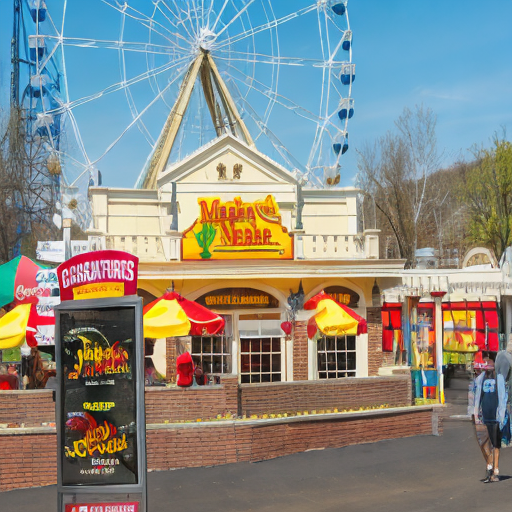

In [3]:
import torch
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline
from IPython.display import display

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
).to("cuda")

pipe.enable_attention_slicing()

init_image = Image.open("/kaggle/input/inputs/LaMa_test_images/000068.png").convert("RGB").resize((512, 512))

mask_image = Image.open("/kaggle/input/inputs/LaMa_test_images/000068_mask.png").convert("L").resize((512, 512))
mask_image = mask_image.point(lambda p: 255 if p > 127 else 0) 

with torch.no_grad():
    result = pipe(
        prompt="",  
        image=init_image,
        mask_image=mask_image,
        strength=1,
        guidance_scale=5.0,
        num_inference_steps=30,
    ).images[0]

result.save("/kaggle/working/output.jpg")
display(result)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

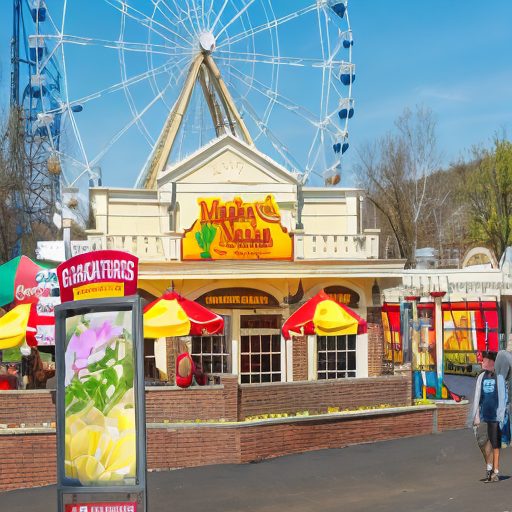

In [14]:
import torch
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline
from IPython.display import display

def run_stable_difussion__inpaint(original_image_path, mask_image_path, output_path, prompt="", strength=1, guidance_scale=5.0, num_inference_steps=30):
    pipe = StableDiffusionInpaintPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-inpainting",
        torch_dtype=torch.float16,
    ).to("cuda")

    pipe.enable_attention_slicing()

    init_image = Image.open(original_image_path).convert("RGB").resize((512, 512))

    mask_image = Image.open(mask_image_path).convert("L").resize((512, 512))
    mask_image = mask_image.point(lambda p: 255 if p > 127 else 0)  

    with torch.no_grad():
        result = pipe(
            prompt=prompt,  
            image=init_image,
            mask_image=mask_image,
            strength=strength,
            guidance_scale=guidance_scale,
            num_inference_steps=num_inference_steps,
        ).images[0]

    result.save(output_path)
    display(result)

run_stable_difussion__inpaint(
    original_image_path="/kaggle/input/inputs/LaMa_test_images/000068.png",
    mask_image_path="/kaggle/input/inputs/LaMa_test_images/000068_mask.png",
    output_path="/kaggle/working/output.jpg",
    prompt="Fill the masked area with background pixels, seamlessly blending with the surrounding area for a realistic result"  
)


In [7]:
import os
import shutil
import subprocess
import matplotlib.pyplot as plt
from PIL import Image

def run_inpaint_inference(original_image_path, mask_image_path):
    # Prepare temp and results directories
    temp_input_dir = "/kaggle/working/temp_input"
    temp_output_dir = "/kaggle/working/temp_output"

    os.makedirs(temp_input_dir, exist_ok=True)
    os.makedirs(temp_output_dir, exist_ok=True)

    try:
        # Copy original and mask images to temp_input_dir
        shutil.copy(original_image_path, temp_input_dir)
        shutil.copy(mask_image_path, temp_input_dir)

        # Prepare the environment variables (optional)
        env = os.environ.copy()
        env["PYTHONPATH"] = "/kaggle/working/inpaint_project"  # adjust if needed

        # Run inpaint inference subprocess
        command = [
            "python", "/kaggle/working/Stable-Diffusion-Inpaint/inpaint_inference.py",
            "--indir", temp_input_dir,
            "--outdir", temp_output_dir,
            "--ckpt", "/kaggle/working/models/ldm/inpainting_big/model_compvis.ckpt",
            "--yaml_profile", "/kaggle/working/Stable-Diffusion-Inpaint/configs/latent-diffusion/inpainting_inference.yaml",
            "--device", "cuda:0",
            "--prefix", "test_example"
        ]

        print("Running inpaint inference...")
        result = subprocess.run(command, env=env, capture_output=True, text=True)

        if result.returncode != 0:
            print("Error running inpainting:")
            print(result.stderr)
            raise RuntimeError("Inpainting subprocess failed.")

        # Find the output image
        output_files = os.listdir(temp_output_dir)
        output_image_path = None
        for filename in output_files:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                output_image_path = os.path.join(temp_output_dir, filename)
                break

        if output_image_path is None:
            raise FileNotFoundError(f"No output image found in {temp_output_dir}")

        # Load and display images
        original_image = Image.open(original_image_path)
        output_image = Image.open(output_image_path)

        fig, axes = plt.subplots(1, 2, figsize=(15, 7))

        axes[0].imshow(original_image)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(output_image)
        axes[1].set_title("Inpainted Image (Output)")
        axes[1].axis('off')

        plt.show()

    except Exception as e:
        print(f"Error: {e}")

    finally:
        # Clean up
        if os.path.exists(temp_input_dir):
            shutil.rmtree(temp_input_dir)
        if os.path.exists(temp_output_dir):
            shutil.rmtree(temp_output_dir)
        print("Temporary folders cleaned up.")



# Manual Script for Lama

In [9]:
import os
import shutil
import subprocess
import matplotlib.pyplot as plt
from PIL import Image

def run_lama_inpaint(original_image_path, mask_image_path):
    # Prepare temp and results directories
    base_temp_dir = "/kaggle/working/temp_input"
    lama_results_dir = "/kaggle/working/lama_results"

    os.makedirs(base_temp_dir, exist_ok=True)
    os.makedirs(lama_results_dir, exist_ok=True)

    try:
        # Copy original image and mask into the temp directory
        shutil.copy(original_image_path, base_temp_dir)
        shutil.copy(mask_image_path, base_temp_dir)

        # Set environment for subprocess
        env = os.environ.copy()
        env["PYTHONPATH"] = "/kaggle/working/lama"

        # Run LaMa prediction
        command = [
            "python", "bin/predict.py",
            "model.path=/kaggle/input/big-lama/big-lama",
            f"indir={base_temp_dir}",
            f"outdir={lama_results_dir}",
            "hydra.run.dir=/kaggle/working"
        ]

        print("Running LaMa inpainting...")
        result = subprocess.run(command, env=env, capture_output=True, text=True)

        if result.returncode != 0:
            print("Error running LaMa:")
            print(result.stderr)
            raise RuntimeError("LaMa subprocess failed.")

        # Wait a little to ensure output files are written
        output_files = os.listdir(lama_results_dir)
        output_image_path = None
        for filename in output_files:
            if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for valid output file
                output_image_path = os.path.join(lama_results_dir, filename)
                break

        if output_image_path is None:
            raise FileNotFoundError(f"No output image found in {lama_results_dir}")

        # Load original and output images
        original_image = Image.open(original_image_path)
        output_image = Image.open(output_image_path)

        # Display the images
        fig, axes = plt.subplots(1, 2, figsize=(15, 7))

        axes[0].imshow(original_image)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(output_image)
        axes[1].set_title("Inpainted Image (Output)")
        axes[1].axis('off')

        plt.show()

    except Exception as e:
        print(f"Error: {e}")

    finally:
        # Clean up temporary directories
        if os.path.exists(base_temp_dir):
            shutil.rmtree(base_temp_dir)
        if os.path.exists(lama_results_dir):
            shutil.rmtree(lama_results_dir)

        print("Temporary input and output folders have been cleaned up.")




Running LaMa inpainting...


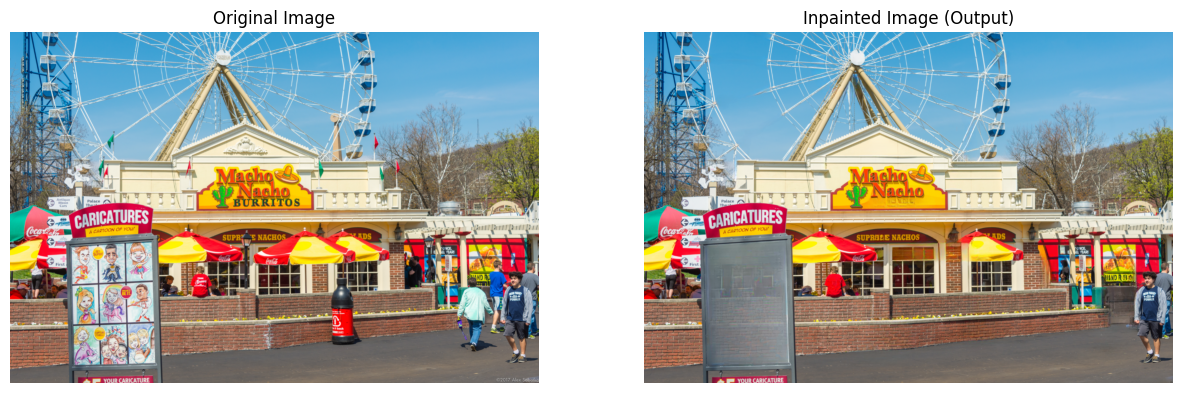

Temporary input and output folders have been cleaned up.


In [12]:
run_lama_inpaint(
    "/kaggle/input/inputs/LaMa_test_images/000068.png",
    "/kaggle/input/inputs/LaMa_test_images/000068_mask.png"
)

In [11]:
cd lama

/kaggle/working/lama


# GUI

In [20]:
import os
import shutil
import subprocess
import matplotlib.pyplot as plt
from PIL import Image
import torch
from diffusers import StableDiffusionInpaintPipeline
import gradio as gr

# Common function to run any LaMa variant
def run_lama_variant_inpaint(original_image_path, mask_image_path, model_folder):
    base_temp_dir = "/kaggle/working/temp_input"
    lama_results_dir = "/kaggle/working/lama_results"

    os.makedirs(base_temp_dir, exist_ok=True)
    os.makedirs(lama_results_dir, exist_ok=True)

    try:
        for f in os.listdir(base_temp_dir):
            os.remove(os.path.join(base_temp_dir, f))

        input_image_path = os.path.join(base_temp_dir, "input.png")
        input_mask_path = os.path.join(base_temp_dir, "input_mask.png")

        shutil.copyfile(original_image_path, input_image_path)
        shutil.copyfile(mask_image_path, input_mask_path)

        env = os.environ.copy()
        env["PYTHONPATH"] = "/kaggle/working/lama"

        command = [
            "python", "/kaggle/working/lama/bin/predict.py",
            f"model.path={model_folder}",
            f"indir={base_temp_dir}",
            f"outdir={lama_results_dir}",
            "hydra.run.dir=."
        ]

        subprocess.run(command, env=env, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

        output_files = os.listdir(lama_results_dir)
        output_image_path = None
        for filename in output_files:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                output_image_path = os.path.join(lama_results_dir, filename)
                break

        if output_image_path is None:
            raise FileNotFoundError(f"No output image found in {lama_results_dir}")

        final_output_path = "/kaggle/working/lama_inpainted_output.png"
        shutil.copy(output_image_path, final_output_path)

        return final_output_path

    finally:
        if os.path.exists(base_temp_dir):
            shutil.rmtree(base_temp_dir)
        if os.path.exists(lama_results_dir):
            shutil.rmtree(lama_results_dir)

# Stable Diffusion Inpainting
def run_stable_diffusion_inpaint(original_image_path, mask_image_path, prompt="", strength=1, guidance_scale=5.0, num_inference_steps=30):
    pipe = StableDiffusionInpaintPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-inpainting",
        torch_dtype=torch.float16,
    ).to("cuda")

    pipe.enable_attention_slicing()

    init_image = Image.open(original_image_path).convert("RGB").resize((512, 512))
    mask_image = Image.open(mask_image_path).convert("L").resize((512, 512))
    mask_image = mask_image.point(lambda p: 255 if p > 127 else 0)

    with torch.no_grad():
        result = pipe(
            prompt=prompt,
            image=init_image,
            mask_image=mask_image,
            strength=strength,
            guidance_scale=guidance_scale,
            num_inference_steps=num_inference_steps,
        ).images[0]

    output_path = "/kaggle/working/sd_inpainted_output.png"
    result.save(output_path)

    return output_path

In [21]:
# Main wrapper
def inpaint_interface(original_image, mask_image, model_name, prompt="Fill the masked area with background pixels, seamlessly blending with the surrounding area for a realistic result"):
    original_image_path = "/kaggle/working/input_original.png"
    mask_image_path = "/kaggle/working/input_mask.png"

    original_image.save(original_image_path)
    mask_image.save(mask_image_path)

    model_name = model_name.lower()

    if model_name == "lama":
        output_path = run_lama_variant_inpaint(original_image_path, mask_image_path, model_folder="/kaggle/input/big-lama/big-lama")
    elif model_name == "lama with discriminator":
        output_path = run_lama_variant_inpaint(original_image_path, mask_image_path, model_folder="/kaggle/input/big-lama-with-discr/big-lama-with-discr")
    elif model_name == "lama celeba hq - regular":
        output_path = run_lama_variant_inpaint(original_image_path, mask_image_path, model_folder="/kaggle/input/lama-celeba-hq/lama-celeba-hq/lama-regular")
    elif model_name == "lama celeba hq - deep":
        output_path = run_lama_variant_inpaint(original_image_path, mask_image_path, model_folder="/kaggle/input/lama-celeba-hq/lama-celeba-hq/lama-deep")
    elif model_name == "lama celeba hq - dilated":
        output_path = run_lama_variant_inpaint(original_image_path, mask_image_path, model_folder="/kaggle/input/lama-celeba-hq/lama-celeba-hq/lama-dilated")
    elif model_name == "lama celeba hq - fourier":
        output_path = run_lama_variant_inpaint(original_image_path, mask_image_path, model_folder="/kaggle/input/lama-celeba-hq/lama-celeba-hq/lama-fourier")
    elif model_name == "lama celeba hq - fourier shallow":
        output_path = run_lama_variant_inpaint(original_image_path, mask_image_path, model_folder="/kaggle/input/lama-celeba-hq/lama-celeba-hq/lama-fourier-shallow")
    elif model_name == "lama celeba hq - small train masks":
        output_path = run_lama_variant_inpaint(original_image_path, mask_image_path, model_folder="/kaggle/input/lama-celeba-hq/lama-celeba-hq/lama_small_train_masks")
    elif model_name == "lama celeba hq - no pl (ablated)":
        output_path = run_lama_variant_inpaint(original_image_path, mask_image_path, model_folder="/kaggle/input/lama-celeba-hq-pl-abl/lama-celeba-hq-pl-abl/lama-no-pl")
    elif model_name == "stable diffusion":
        output_path = run_stable_diffusion_inpaint(original_image_path, mask_image_path, prompt=prompt)
    else:
        raise ValueError(f"Unsupported model: {model_name}")

    output_image = Image.open(output_path)
    return output_image

# Build Gradio UI
with gr.Blocks() as iface:
    gr.Markdown("# 🖌️ Image Inpainting Tool")
    gr.Markdown("Upload an **original image** and a **mask image**. Select a model to inpaint the masked region.")

    with gr.Row():
        original_input = gr.Image(
            type="pil",
            label="Original Image",
            height=300,
            width=300,
        )
        mask_input = gr.Image(
            type="pil",
            label="Mask Image",
            height=300,
            width=300,
        )

    with gr.Row():
        model_choice = gr.Dropdown(
            [
                "LaMa",
                "LaMa with Discriminator",
                "LaMa Celeba HQ - Regular",
                "LaMa Celeba HQ - Deep",
                "LaMa Celeba HQ - Dilated",
                "LaMa Celeba HQ - Fourier",
                "LaMa Celeba HQ - Fourier Shallow",
                "LaMa Celeba HQ - Small Train Masks",
                "LaMa Celeba HQ - No PL (Ablated)",
                "Stable Diffusion"
            ],
            label="Choose Inpainting Model"
        )
        prompt_input = gr.Textbox(
            lines=2,
            label="Prompt (only used for Stable Diffusion)",
            placeholder="Example: Fill the masked area with realistic scenery..."
        )

    output_image = gr.Image(
        type="pil",
        label="Inpainted Output",
        height=300,
        width=300,
    )

    btn = gr.Button("Run Inpainting")

    btn.click(
        inpaint_interface,
        inputs=[original_input, mask_input, model_choice, prompt_input],
        outputs=output_image
    )

iface.launch(debug=True)

* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://0bd8161fb59dfc2ede.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0bd8161fb59dfc2ede.gradio.live
